# M4-L2 Problem 1 

Now you will try support vector classification on data with nonlinear decision boundaries. You will use the sklearn SVC tool on four datasets. Your job is to find an appropriate choice of kernel and regularization strength that does a qualitatively good job separating the data.  

Run this cell first:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Plotting functions:
def plot_data(X,c,s=30):
    lims = [0,1]

    markers = [dict(marker="o", color="royalblue"), dict(marker="s", color="red"), dict(marker="^", color="limegreen")]

    x,y = X[:,0], X[:,1]
    iter = 0
    for i in np.unique(c):
        marker = markers[iter]
        iter += 1
        plt.scatter(x[c==i], y[c==i], s=s, **(marker), edgecolor="black", linewidths=0.4, label="y = " + str(i))

def plot_SVs(svm, s=120):
    sv = svm.support_vectors_
    x, y = sv[:,0], sv[:,1]
    plt.scatter(x, y, s=s, edgecolor="black", facecolor="none", linewidths=1.5)

def plot_SV_decision_boundary(svm, margin=True,extend=True, shade_margins=False, shade_decision=False):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xrange = xlim[1] - xlim[0]
    yrange = ylim[1] - ylim[0]

    x = np.linspace(xlim[0] - extend*xrange, xlim[1] + extend*xrange, 200)
    y = np.linspace(ylim[0] - extend*yrange, ylim[1] + extend*yrange, 200)

    X,Y = np.meshgrid(x,y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = svm.decision_function(xy)

    P = P.reshape(X.shape)
    ax.contour(X, Y, P, colors='k',levels=[0],linestyles=['-'])
    if margin:
        ax.contour(X, Y, P, colors='k',levels=[-1, 1], alpha=0.6,linestyles=['--'])

    if shade_margins:
        cmap = ListedColormap(["white","lightgreen"])
        plt.pcolormesh(X,Y,np.abs(P)<1,shading="nearest",cmap=cmap,zorder=-999999)

    if shade_decision:
        cmap = ListedColormap(["lightblue","lightcoral"])
        pred = (svm.predict(xy).reshape(X.shape) == 1).astype(int)
        plt.pcolormesh(X,Y,pred,shading="nearest",cmap=cmap,zorder=-1000)

    plt.xlim(xlim)
    plt.ylim(ylim)

def plot(Xdata, ydata, svm_model=None, title=""):
    plt.figure(figsize=(5,5))
    plot_data(Xdata,ydata)
    if svm_model is not None:
        plot_SVs(svm_model)
        plot_SV_decision_boundary(svm_model,margin=True,shade_decision=True)
    plt.legend()
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title(title)
    plt.show()

## Loading the data

There are four datasets, all 2D and with X and y names as follows:
- Xa, ya
- Xb, yb
- Xc, yc
- Xd, yd

Run this cell to load and plot the data:

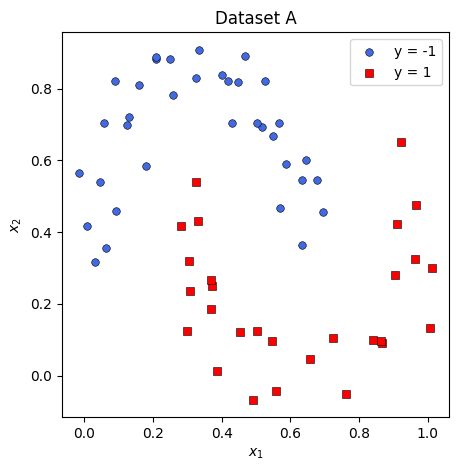

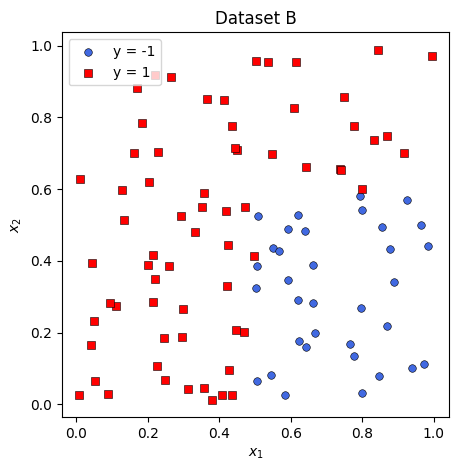

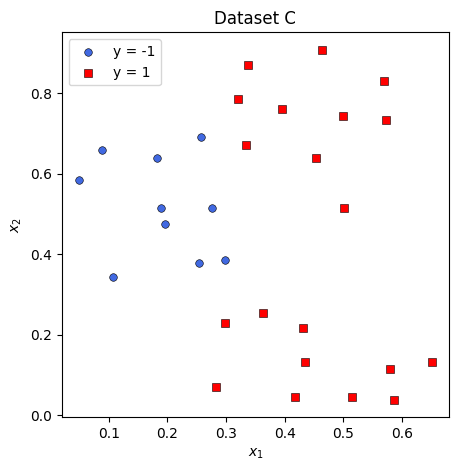

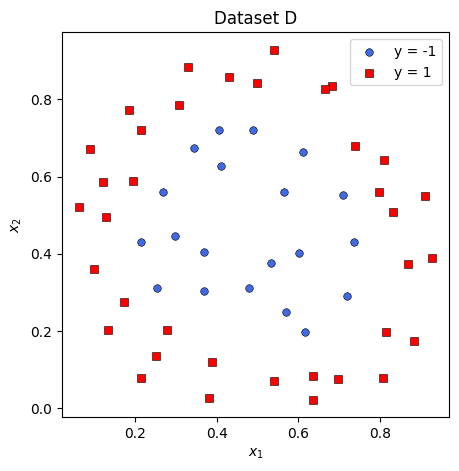

In [2]:
xa0 = np.array([0.00806452, 0.0467742, -0.0145161, 0.0564516, 0.130645, 0.0887097, 0.208065, 0.25, 0.324194, 0.259677, 0.469355, 0.333871, 0.417742, 0.430645, 0.566129, 0.58871, 0.646774, 0.695161, 0.633871, 0.569355, 0.55, 0.446774, 0.527419, 0.517742, 0.679032, 0.633871, 0.501613, 0.401613, 0.208065, 0.159677, 0.124194, 0.179032, 0.0919355, 0.0629032, 0.0306452])
ya0 = np.array([0.418367, 0.540816, 0.565306, 0.704082, 0.720408, 0.822449, 0.883673, 0.883673, 0.830612, 0.781633, 0.891837, 0.908163, 0.822449, 0.704082, 0.704082, 0.589796, 0.602041, 0.455102, 0.365306, 0.467347, 0.667347, 0.818367, 0.822449, 0.691837, 0.544898, 0.544898, 0.704082, 0.838776, 0.887755, 0.810204, 0.7, 0.585714, 0.459184, 0.357143, 0.316327])
xa1 = np.array([0.324194, 0.304839, 0.372581, 0.369355, 0.453226, 0.546774, 0.724194, 0.866129, 1.00806, 1.01129, 0.91129, 0.904839, 0.840323, 0.656452, 0.501613, 0.369355, 0.330645, 0.282258, 0.308065, 0.298387, 0.385484, 0.491935, 0.762903, 0.559677, 0.862903, 0.962903, 0.966129, 0.920968])
ya1 = np.array([0.540816, 0.320408, 0.25102, 0.185714, 0.120408, 0.0959184, 0.104082, 0.0918367, 0.132653, 0.3, 0.422449, 0.279592, 0.1, 0.0469388, 0.12449, 0.267347, 0.430612, 0.418367, 0.234694, 0.12449, 0.0142857, -0.0673469, -0.0510204, -0.0428571, 0.0959184, 0.32449, 0.47551, 0.65102])
Xa = np.concatenate([np.vstack([xa0,ya0]).T,np.vstack([xa1,ya1]).T],0)
ya = np.array([-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,])
plot(Xa,ya,title="Dataset A")

xb1 = np.array([0.43599,0.54966,0.42037,0.20465,0.29965,0.62113,0.13458,0.18444,0.85398,0.84656,0.50525,0.42812,0.12716,0.22601,0.22031,0.46779,0.64041,0.50524,0.79364,0.1623,0.96455,0.88952,0.56714,0.43675,0.5356,0.54421,0.36634,0.40628,0.24718,0.99385,0.80026,0.76496,0.29302,0.35662,0.98315,0.504,0.25974,0.83202,0.37921,0.7974,0.58268,0.6622,0.49707,0.35087,0.97291,0.31326,0.7384,0.21464,0.64384,0.17048,0.77801,0.86892,0.79859,0.22084,0.59208,0.26378,0.41974,0.60844,0.62356,0.59126,0.54791,0.24581,0.11058,0.01025,0.29517,0.095288,0.21492,0.47141,0.84511,0.048868,0.64331,0.87015,0.74176,0.79889,0.22957,0.087563,0.35713,0.052223,0.043501,0.66843,0.87627,0.61964,0.61525,0.44801,0.42537,0.50762,0.042429,0.45023,0.77759,0.50278,0.33187,0.74837,0.41446,0.44457,0.0084484,0.94045,0.66197,0.20084,0.9259,0.91671,])
xb2 = np.array([0.025926,0.43532,0.33033,0.61927,0.26683,0.52914,0.51358,0.78534,0.49424,0.079645,0.065287,0.096531,0.59675,0.10695,0.34983,0.20174,0.48307,0.38689,0.58,0.70075,0.50001,0.34161,0.42755,0.77656,0.95374,0.082095,0.85085,0.027202,0.067144,0.97058,0.60182,0.16923,0.52407,0.045679,0.44135,0.32354,0.38689,0.73675,0.013017,0.26939,0.025551,0.38752,0.41491,0.55098,0.11278,0.041798,0.65751,0.41675,0.66148,0.88165,0.13395,0.74878,0.54335,0.91846,0.34624,0.91392,0.54019,0.82625,0.17671,0.48927,0.69952,0.18663,0.27406,0.62936,0.18729,0.28376,0.2856,0.5495,0.98851,0.23212,0.16147,0.2174,0.65302,0.031248,0.70463,0.030589,0.58978,0.065664,0.39515,0.19803,0.43239,0.29043,0.95366,0.20705,0.44457,0.52573,0.16442,0.70797,0.7771,0.95675,0.48146,0.85784,0.84868,0.71575,0.025201,0.10214,0.28326,0.38833,0.57027,0.70226,])
yb = np.array([1,-1,1,1,1,-1,1,1,-1,-1,-1,1,1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,1,-1,1,1,1,1,1,-1,1,1,-1,-1,1,1,1,-1,-1,-1,1,1,-1,1,1,1,1,1,-1,1,-1,1,-1,1,1,1,-1,-1,1,1,1,1,1,1,1,1,1,1,-1,-1,1,-1,1,1,1,1,1,-1,-1,-1,1,1,1,-1,1,1,1,1,1,1,1,1,1,-1,-1,1,-1,1,])
Xb = np.vstack([xb1,xb2]).T
plot(Xb,yb,title="Dataset B")

xc1 = np.array([0.05,0.08871,0.18226,0.18871,0.27581,0.25323,0.10806,0.19516,0.25645,0.29839,0.3371,0.4629,0.49839,0.33387,0.39516,0.32097,0.45323,0.56936,0.50161,0.57258,0.41774,0.58548,0.43387,0.28226,0.29839,0.3629,0.43065,0.57903,0.51452,0.65,])
xc2 = np.array([0.58571,0.65918,0.63878,0.51633,0.51633,0.37755,0.3449,0.47551,0.69184,0.38571,0.87143,0.90816,0.7449,0.67143,0.76122,0.78571,0.63878,0.83061,0.51633,0.73265,0.046939,0.038775,0.13265,0.071429,0.23061,0.2551,0.21837,0.11633,0.046939,0.13265,])
Xc = np.vstack([xc1,xc2]).T
yc = np.array([-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,])
plot(Xc,yc,title="Dataset C")

xd1 = np.array([0.062903,0.08871,0.18548,0.33065,0.54032,0.68226,0.81129,0.91129,0.92742,0.88548,0.80807,0.6371,0.38226,0.21452,0.13387,0.098387,0.12097,0.21452,0.30806,0.49839,0.66613,0.74032,0.83387,0.86935,0.81452,0.69839,0.54032,0.38871,0.25,0.17258,0.12742,0.43065,0.79839,0.6371,0.27903,0.19516,0.40484,0.48871,0.61129,0.71129,0.7371,0.72097,0.61774,0.56936,0.47903,0.36935,0.25323,0.21452,0.26936,0.34355,0.41129,0.56613,0.60161,0.53387,0.36935,0.29839,])
xd2 = np.array([0.52041,0.67143,0.77347,0.88367,0.92857,0.83469,0.64286,0.54898,0.3898,0.17347,0.079592,0.022449,0.026531,0.079592,0.20204,0.36122,0.58571,0.72041,0.78571,0.84286,0.82653,0.67959,0.50816,0.37347,0.19796,0.07551,0.071429,0.12041,0.13673,0.27551,0.49592,0.85918,0.56122,0.083673,0.20204,0.5898,0.72041,0.72041,0.66326,0.55306,0.43061,0.29184,0.19796,0.25102,0.31224,0.30408,0.31224,0.43061,0.56122,0.67551,0.62653,0.56122,0.40204,0.37755,0.40612,0.44694,])
Xd = np.vstack([xd1,xd2]).T
yd = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,])
plot(Xd,yd,title="Dataset D")

## Using the Kernel Trick

Now, train four SVC models, one for each dataset. Try out different combinations of 'kernel' and 'C', until you find a satisfactory classifier in each case.

Please generate a plot for each dataset showing the results of a trained support vector classifier, using the provided function:

`plot(Xdata, ydata, svm_model, title)`

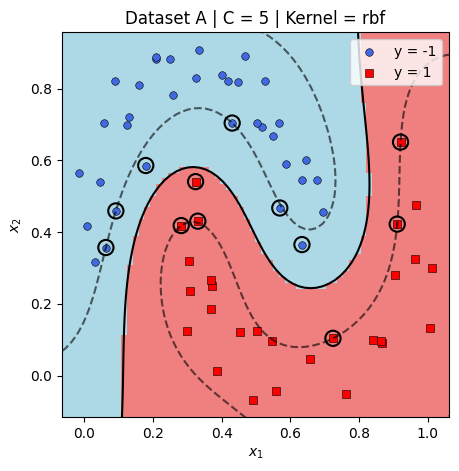

In [18]:
# YOUR CODE GOES HERE
# (Dataset A)
svm_a = SVC(C = 5, kernel = 'rbf')
svm_a.fit(Xa, ya)
plot(Xa, ya, svm_a, "Dataset A | C = 5 | Kernel = rbf")

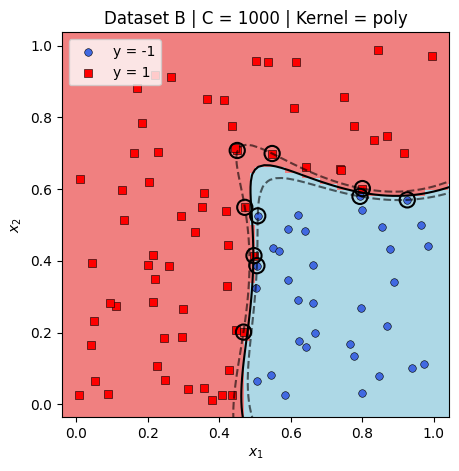

In [64]:
# YOUR CODE GOES HERE
# (Dataset B)
svm_b = SVC(C = 1000, kernel = 'rbf')
svm_b.fit(Xb, yb)
plot(Xb, yb, svm_b, "Dataset B | C = 1000 | Kernel = poly")

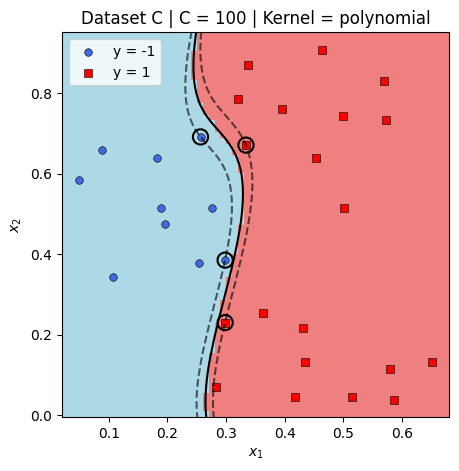

In [70]:
# YOUR CODE GOES HERE
# (Dataset C)
svm_c = SVC(C = 100, kernel = 'poly', degree = 4)
svm_c.fit(Xc, yc)
plot(Xc, yc, svm_c, "Dataset C | C = 100 | Kernel = polynomial")

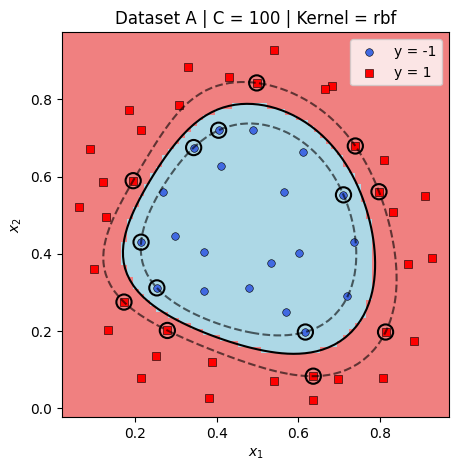

In [58]:
# YOUR CODE GOES HERE
# (Dataset D)
svm_d = SVC(C = 100, kernel = 'rbf')
svm_d.fit(Xd, yd)
plot(Xd, yd, svm_d, "Dataset A | C = 100 | Kernel = rbf")